#6. Домашнее задание по теме Визуализация данных (MatPlotLib)

##Формулировка задания:

С помощью фреймворка MatPlotLib визуализировать результаты аналитики из домашнего задания №5.

Планируемый результат:
В ноутбуке Colab под каждой аналитическим исследованием имеется графическое изображение результатов исследования

Описания плана работы:
Открыть ноутбук в Сolab из ДЗ №5.
Результаты п.8 с помощью matplotlib визуализировать.
Пример: Количество выживших и умерших в зависимости от возраста (*возраст берется в интервалах 10 лет)




Перечень инструментов, необходимых для реализации деятельности:\
1)	Google Colab https://colab.research.google.com/ \
2)	Matplotlib


##Выполнение задания

###1. Ноутбук в Colab создан.
###2. Датасет сохранен в GitHubе и импортирован в Colab

In [81]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/AntonioLapko/Course_of_ArchitectAI/main/Titanic-Dataset.csv')

###3. Перечень и описание столбцов определено через df.info().


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###4. Определение количества пустых ячеек

In [83]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###5. Заполнение пустых значений столбцы "Age" (возраст) средним значением по столбцу

In [84]:
# Фильтрация столбца "Age" от пустых значений
dfdropnaAge=df.dropna(subset = ['Age'])
# Расчет среднего значения столбца "Age" без пустых ячеек
mid = dfdropnaAge['Age'].mean()
# Округление до целых среднего значения столбца "Age"
mid = round(mid)
print(mid)
# Исключение строк с нулевыми значениями "Age"
df = df[df.Age != '0']
# Замена в датафрейме пустых значений столбца "Age" на среднее значение по столбцу
df['Age'] = df['Age'].fillna(mid)
df.info()

30
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


###6. Удаление строк с пустыми значениями

In [85]:
# Удаление столбца "Cabin"
df = df.drop(columns='Cabin', inplace=False)
# Удаление строк с пустыми значениями
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


###7. Аналитика по каждому признаку:

*   Количество уникальных значений;
*   Минимальное и максимальное значение.


In [86]:
#Количество уникальных значений
print('Уникальные значения столбца с идентификаторами пассажиров - ', df['PassengerId'].nunique())
print('Уникальные значения столбца с признаком выжил/не выжил пассажира - ', df['Survived'].nunique())
print('Уникальные значения столбца с классами круиза - ', df['Pclass'].nunique())
print('Уникальные значения столбца с ФИО пассажиров - ', df['Name'].nunique())
print('Уникальные значения столбца с гендерной принадлежностью пассажиров - ', df['Sex'].nunique())
print('Уникальные значения столбца с возрастом пассажиров - ', df['Age'].nunique())
print('Уникальные значения столбца с число братьев, сестер или супругов на борту у человека - ', df['SibSp'].nunique())
print('Уникальные значения столбца с количество родителей или детей, с которыми путешествовал каждый пассажир - ', df['Parch'].nunique())
print('Уникальные значения столбца с номерами билетов - ', df['Ticket'].nunique())
print('Уникальные значения столбца с ценами билетов - ', df['Fare'].nunique())
print('Уникальные значения столбца с портами посадки - ', df['Embarked'].nunique())
df.nunique()

Уникальные значения столбца с идентификаторами пассажиров -  889
Уникальные значения столбца с признаком выжил/не выжил пассажира -  2
Уникальные значения столбца с классами круиза -  3
Уникальные значения столбца с ФИО пассажиров -  889
Уникальные значения столбца с гендерной принадлежностью пассажиров -  2
Уникальные значения столбца с возрастом пассажиров -  88
Уникальные значения столбца с число братьев, сестер или супругов на борту у человека -  7
Уникальные значения столбца с количество родителей или детей, с которыми путешествовал каждый пассажир -  7
Уникальные значения столбца с номерами билетов -  680
Уникальные значения столбца с ценами билетов -  247
Уникальные значения столбца с портами посадки -  3


PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [87]:
#Максимальные значения
maximums = df.max()
maximums

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
Embarked                                 S
dtype: object

In [88]:
#Минимальные значения
minimums = df.min()
minimums

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
Embarked                         C
dtype: object

###8.*С помощью аналитики определить влияние всех признаков на признак Survived (выживание). Пример: Parch и SibSP отрицательно влияли на выживание при крушении , так как чем больше эти параметры тем ниже процент выживания (одиночке выжить проще)

1. Идентификатор пассажира (passengerId) нет смысла рассматривать.
2. Класс круиза (Pclass). Чем выше класс (где 1 - высокий, 3 - низкий) тем больше выживших.
3. ФИО (Name). Так как все ФИО уникальны, то ФИО никак не влияет на виживаемость. Если бы они были не все уникальны, то можно было посмотреть с каким ФИО больше выживших.
4. Гендер (Sex). Мужчин погибло больше чем женщин (женщине выжить проще).
5. Возраст (Age). Выживают пассажиры ближе к среднему возрасту (30). Чем ближе к среднему возрасту тем больше выживших.    
6. Количество братьев и сестер на борту (SibSp). Влияние на выживание указано в задании.
7. Количество родителей или детей, с которыми путешествовал каждый пассажир (Parch). Влияние на выживание указано в задании.
8. Номер билета (Ticket). Так же как и иднетификатор пассажира является уникальным значениеми анализировать его нет смысла.
9. Цена билета (Fare). Чем дороже билет, тем больше жансов выжить.
10. Порт посадки (Embarked). Больше выжило пассажиров с посадкой в порте C, потом в Q и на последнем месте порт S.

Разделение на две выборки: выжившие и невыжившие

In [89]:
isSurvived = df.loc[(df['Survived'] == 1)]
istSurvived = df.loc[(df['Survived'] == 0)]

####Влияние класса круиза (Pclass) на выживание

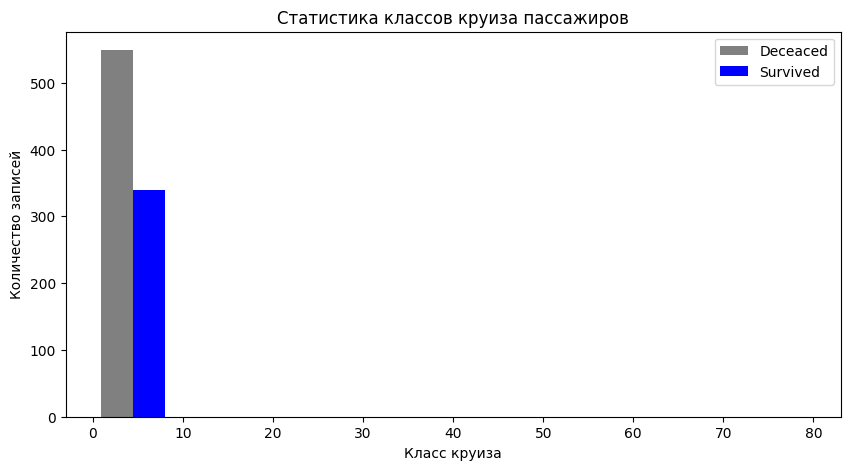

In [92]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
bins = np.linspace(0, 80, 10)
plt.hist([istSurvived['Pclass'], isSurvived['Pclass']], bins, color = ['gray', 'blue'], label=['Deceaced', 'Survived'])
plt.legend(loc='upper right')
plt.xlabel("Класс круиза")
plt.ylabel("Количество записей")
plt.title("Статистика классов круиза пассажиров")
plt.show()

####Влияние гендера (Sex) на выживание

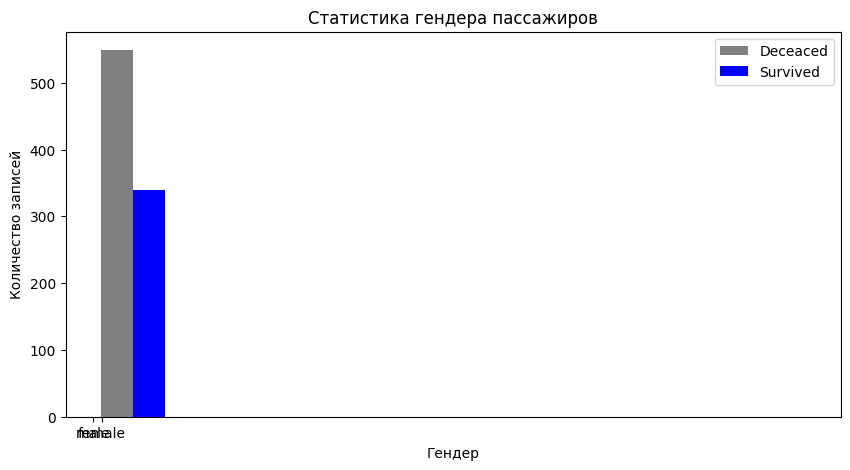

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
bins = np.linspace(0, 80, 10)
plt.hist([istSurvived['Sex'], isSurvived['Sex']], bins, color = ['gray', 'blue'], label=['Deceaced', 'Survived'])
plt.legend(loc='upper right')
plt.xlabel("Гендер")
plt.ylabel("Количество записей")
plt.title("Статистика гендера пассажиров")
plt.show()

####Влияние возраста (Age) на выживание

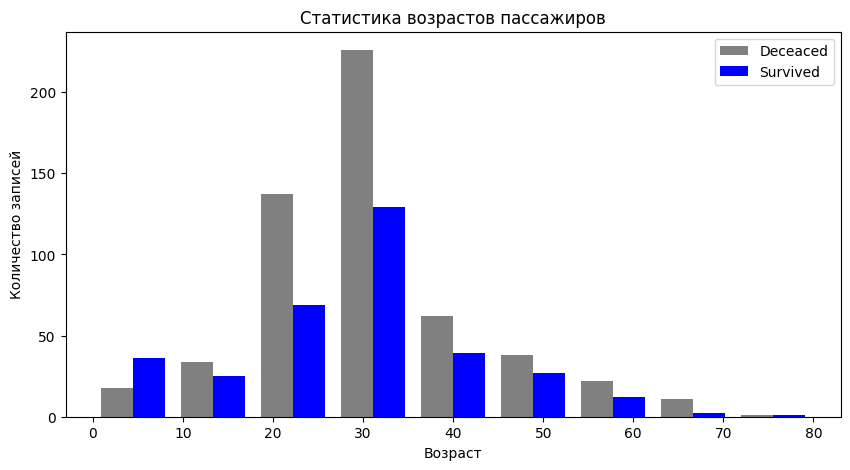

In [91]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
bins = np.linspace(0, 80, 10)
plt.hist([istSurvived['Age'], isSurvived['Age']], bins, color = ['gray', 'blue'], label=['Deceaced', 'Survived'])
plt.legend(loc='upper right')
plt.xlabel("Возраст")
plt.ylabel("Количество записей")
plt.title("Статистика возрастов пассажиров")
plt.show()

####Влияние цены билета (Fare) на выживание

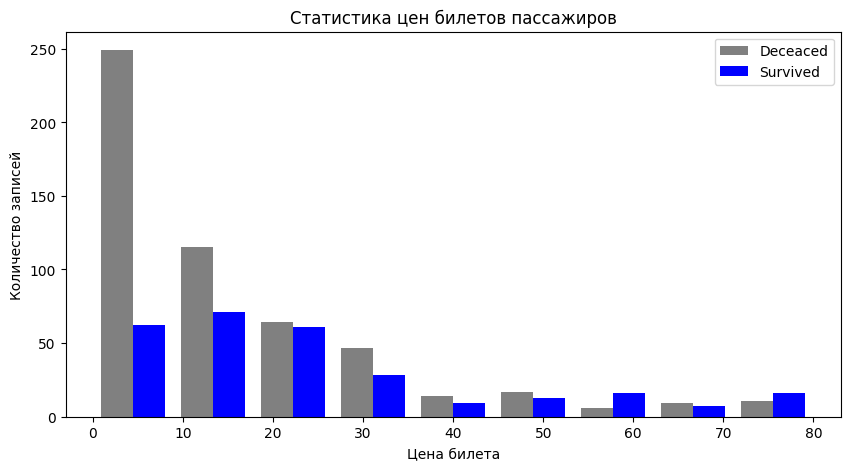

In [95]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
bins = np.linspace(0, 80, 10)
plt.hist([istSurvived['Fare'], isSurvived['Fare']], bins, color = ['gray', 'blue'], label=['Deceaced', 'Survived'])
plt.legend(loc='upper right')
plt.xlabel("Цена билета")
plt.ylabel("Количество записей")
plt.title("Статистика цен билетов пассажиров")
plt.show()

####Влияние порта посадки (Embarked) на выживание

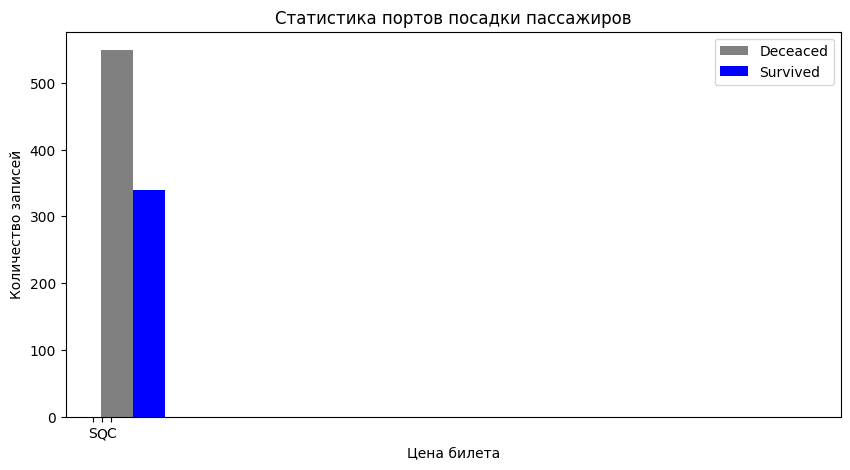

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
bins = np.linspace(0, 80, 10)
plt.hist([istSurvived['Embarked'], isSurvived['Embarked']], bins, color = ['gray', 'blue'], label=['Deceaced', 'Survived'])
plt.legend(loc='upper right')
plt.xlabel("Цена билета")
plt.ylabel("Количество записей")
plt.title("Статистика портов посадки пассажиров")
plt.show()